In [1]:
#add magic matplotlib line to show graphs throughout
%matplotlib inline

#add dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np

#adding filepaths and cvs readers
ride_file_load = "Resources/ride_data.csv"
city_file_load = "Resources/city_data.csv"

ride_df = pd.read_csv(ride_file_load)
city_df = pd.read_csv(city_file_load)



In [2]:
#EXPLORING DATA AND MERGING DATAFRAMES

#finding null values
ride_df.count()
city_df.isnull().sum()

#looking at datatypes 
ride_df.dtypes
city_df.dtypes

#seeing numbers of types of cities
sum(city_df["type"]=="Urban")
city_df["type"].value_counts()

#merging dataframes because no missing values and all data types that need to be numerical are
city_ride_df = ride_df.merge(city_df, left_on="city", right_on="city")

city_ride_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2019-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2019-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2019-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2019-01-02 14:14:50,13.89,424254840012,5,Urban
...,...,...,...,...,...,...
2370,West Heather,2019-04-18 19:33:12,46.60,3671003215967,4,Rural
2371,West Heather,2019-03-02 21:04:10,20.99,5766454453070,4,Rural
2372,West Heather,2019-03-06 20:06:51,48.11,2570548892682,4,Rural
2373,West Heather,2019-02-02 06:28:04,53.07,2462950442268,4,Rural


In [3]:
#creating different dataframes based on city type
city_ride_df["type"].value_counts()

urban_df=city_ride_df[city_ride_df["type"]=="Urban"]
suburban_df=city_ride_df[city_ride_df["type"]=="Suburban"]
rural_df=city_ride_df[city_ride_df["type"]=="Rural"]

#ride count per city type
#grouping each city type dataset based on city, and counting them, and putting them in one list
urban_ride_count = urban_df.groupby(urban_df["city"]).count()["ride_id"]
suburban_ride_count = suburban_df.groupby(suburban_df["city"]).count()["ride_id"]
rural_ride_count = rural_df.groupby(rural_df["city"]).count()["ride_id"]

#average fare per city type
urban_avg_fare = urban_df.groupby(urban_df["city"]).mean()["fare"]
suburban_avg_fare = suburban_df.groupby(suburban_df["city"]).mean()["fare"]
rural_avg_fare = rural_df.groupby(rural_df["city"]).mean()["fare"]

#average number of drivers per city 
urban_driver_count = urban_df.groupby(urban_df["city"]).mean()["driver_count"]
suburban_driver_count = suburban_df.groupby(suburban_df["city"]).mean()["driver_count"]
rural_driver_count = rural_df.groupby(rural_df["city"]).mean()["driver_count"]

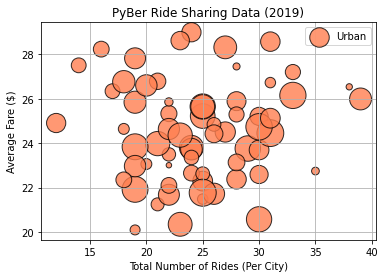

In [4]:
#CREATING URBAN BUBBLE CHART

plt.scatter(urban_ride_count, urban_avg_fare, 
            s=10*urban_driver_count, 
            linewidth=1, 
            edgecolor="Black", 
            color="Coral", 
            alpha=0.8, 
            label="Urban")
plt.title("PyBer Ride Sharing Data (2019)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid()
plt.legend()


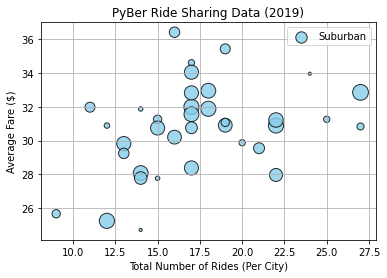

In [5]:
#CREATING SUBURBAN BUBBLE CHART

plt.scatter(suburban_ride_count, suburban_avg_fare, 
            s=10*suburban_driver_count, 
            linewidth=1, 
            edgecolor="Black", 
            color="Skyblue", 
            alpha=0.8, 
            label="Suburban")
plt.title("PyBer Ride Sharing Data (2019)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid()
plt.legend()

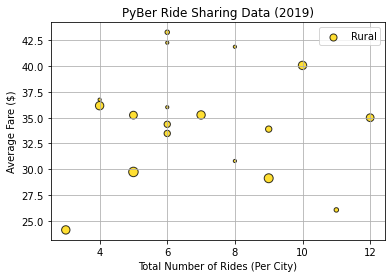

In [6]:
#CREATING RURAL BUBBLE CHART

plt.scatter(rural_ride_count, rural_avg_fare, 
            s=10*rural_driver_count, 
            linewidth=1, 
            edgecolor="Black", 
            color="gold", 
            alpha=0.8, 
            label="Rural")
plt.title("PyBer Ride Sharing Data (2019)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid()
plt.legend()

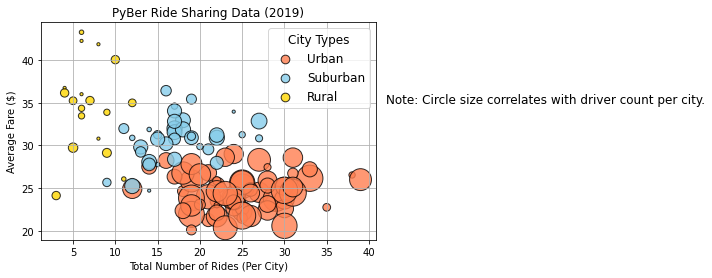

In [7]:
#COMBINING ALL THREE CHARTS INTO ONE

plt.scatter(urban_ride_count, urban_avg_fare, 
            s=10*urban_driver_count, 
            linewidth=1, 
            edgecolor="Black", 
            color="Coral", 
            alpha=0.8, 
            label="Urban")

plt.scatter(suburban_ride_count, suburban_avg_fare, 
            s=10*suburban_driver_count, 
            linewidth=1, 
            edgecolor="Black", 
            color="Skyblue", 
            alpha=0.8, 
            label="Suburban")

plt.scatter(rural_ride_count, rural_avg_fare, 
            s=10*rural_driver_count, 
            linewidth=1, 
            edgecolor="Black", 
            color="gold", 
            alpha=0.8, 
            label="Rural")

#other chart properties:
plt.title("PyBer Ride Sharing Data (2019)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid()

#make legend have same size icons by declaring legend variable
lgnd=plt.legend(fontsize=12,     #declaring variable, making font of urban, suburban, rural = 12
                mode="Expanded", #supposed to expand the legend horizontally to fit the area??
                scatterpoints=1, #number of colored circles in legend
                loc="best", #location for legend is wherever it fits best in the plot
                title="City Types") #title for legend
lgnd.legendHandles[0]._sizes = [75] #setting font size to 75 for each marker in legend (circle)
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

#text label about why circles are different sizes
plt.text(42,35, "Note: Circle size correlates with driver count per city.", fontsize=12)

#save figure
plt.savefig("Analysis/Fig1.png", bbox_inches = "tight")

#show the combined plot
plt.show()



The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22]), count=array([7])).
West Angela has the highest urban rider count.


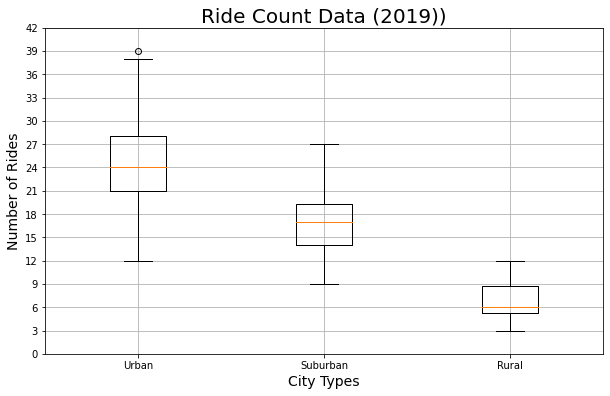

In [93]:
#Summary Statistics (mean, median, mode)

#statistics for each city type
urban_df.describe()
suburban_df.describe()
rural_df.describe()

#mean rides for each city type
round(urban_ride_count.mean(),2)
round(suburban_ride_count.mean(),2)
round(rural_ride_count.mean(),2)

#median rides for each city type
round(urban_ride_count.median(),2)
round(suburban_ride_count.median(),2)
round(rural_ride_count.median(),2)

#mode rides for each city type
round(urban_ride_count.mode(),2)
round(suburban_ride_count.mode(),2)
round(rural_ride_count.mode(),2)

#calculating statistics for urban rides using numpy and scipy.stats, which is what you need to use in visual studio code
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

# Create a box-and-whisker plot for the urban cities ride count.
xlabels=["Urban", "Suburban", "Rural"] #how to set x axis label in boxplot
ride_counts = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig,ax=plt.subplots(figsize=(10,6))
ax.boxplot(ride_counts, labels=xlabels)
ax.set_title("Ride Count Data (2019))", fontsize=20)
ax.set_ylabel("Number of Rides", fontsize=14)
ax.set_xlabel("City Types", fontsize=14)
ax.set_yticks(np.arange(0,45, step=3.0))
ax.grid()
plt.savefig("Analysis/fig2.png")

urban_city_outlier= urban_ride_count[urban_ride_count==39].index[0] #inside has just the city that equals 39 set as true, all other cities set to false. Then it makes a list with just that city and makes it called urban city outlier. It then says "what is the index (city, at index 0) of this value?"
print(f"{urban_city_outlier} has the highest urban rider count.")




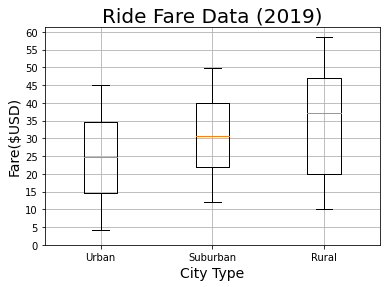

In [92]:
#average fares for each city type
urban_fares=urban_df["fare"]
suburban_fares=suburban_df["fare"]
rural_fares=rural_df["fare"]

mean_urban_fares = round(urban_fares.mean(),2)
#print(f"The mean for fares for urban trips is {mean_urban_fares:.2f}.")
mean_suburban_fares = round(suburban_fares.mean(),2)
#print(f"The mean for fares for suburban trips is {mean_suburban_fares:.2f}.")
mean_rural_fares = round(rural_fares.mean(),2)
#print(f"The mean for fares for rural trips is {mean_rural_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
#print(f"The median for fares for urban trips is {median_urban_fares:.2f}.")
median_suburban_fares = np.median(suburban_fares)
#print(f"The median for fares for suburban trips is {median_suburban_fares:.2f}.")
median_rural_fares = np.median(rural_fares)
#print(f"The median for fares for rural trips is {median_rural_fares:.2f}.")

mode_urban_fares = round(urban_fares.mode(),2)
#print(f"The mode for fares for urban trips is {mode_urban_fares[0]:.2f}.")
mode_suburban_fares = round(suburban_fares.mode(),2)
#print(f"The mode for fares for suburban trips is {mode_suburban_fares[0]:.2f}.")
mode_rural_fares = round(rural_fares.mode(),2)
#print(f"The mode for fares for rural trips is {mode_rural_fares[0]:.2f}.")

#making boxplot of ride fares by city
xlabels=["Urban", "Suburban", "Rural"]
fare_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots()
ax.boxplot(fare_data, labels=xlabels)
ax.set_xlabel("City Type", fontsize=14)
ax.set_ylabel("Fare($USD)", fontsize=14)
ax.set_title("Ride Fare Data (2019)", fontsize=20)
ax.set_yticks(np.arange(0, 61, step=5.0))
ax.grid()

plt.savefig("Analysis/fig3.png")

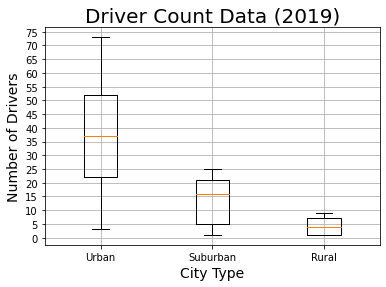

In [90]:
#summary statistics for number of drivers by city type
urban_drivers=urban_df["driver_count"]
mean_urban_drivers = np.mean(urban_drivers)
median_urban_drivers = np.median(urban_drivers)
mode_urban_drivers = sts.mode(urban_drivers)

suburban_drivers=suburban_df["driver_count"]
mean_suburban_drivers = np.mean(suburban_drivers)
median_suburban_drivers = np.median(suburban_drivers)
mode_suburban_drivers = sts.mode(suburban_drivers)

rural_drivers=rural_df["driver_count"]
mean_rural_drivers = np.mean(rural_drivers)
median_rural_drivers = np.median(rural_drivers)
mode_rural_drivers = sts.mode(rural_drivers)


#box and whisker plot
#cities=[urban_drivers, suburban_drivers, rural_drivers]
cities = [urban_drivers, suburban_drivers, rural_drivers]
city_labels = ["Urban", "Suburban", "Rural"]
fig, ax = plt.subplots()
ax.boxplot(cities, labels=city_labels)
ax.set_title("Driver Count Data (2019)", fontsize=20)
ax.set_xlabel("City Type", fontsize=14)
ax.set_ylabel("Number of Drivers", fontsize=14)
ax.set_yticks(np.arange(0,80, step=5.0))
ax.grid()

plt.savefig("Analysis/fig4.png")

In [ ]:
Create a pie chart that visualizes each of the following data for each city type:
The percent of total fares.
The percent of total rides.
The percent of total drivers.